<a href="https://colab.research.google.com/github/mohmaed7777/knn-algorithm-HR-Analytics-Job-Change-of-Data-Scientists/blob/main/HR_Analytics_Job_Change_of_Data_Scientists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:-**

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set()
%config InlineBackend.figure_formats=['retina']
%pylab inline
import seaborn as sns
import sklearn 

Populating the interactive namespace from numpy and matplotlib


In [33]:
file_path = '/content/aug_train.csv'
df = pd.read_csv(file_path, sep=',')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [35]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [36]:
# Check the missing Data: 
missing_data = df.isnull().sum()
missing_data[:]

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [37]:
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)

In [38]:
df.head(2)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [39]:
df.drop(['city_development_index', 'gender','enrolled_university','company_size','company_type','last_new_job'], axis=1, inplace=True)

In [40]:
df.fillna(0, axis=0, inplace=True)

In [41]:
df.head()

,relevent_experience,education_level,major_discipline,experience,training_hours,target
0,Has relevent experience,Graduate,STEM,>20,36,1.0
1,No relevent experience,Graduate,STEM,15,47,0.0
2,No relevent experience,Graduate,STEM,5,83,0.0
3,No relevent experience,Graduate,Business Degree,<1,52,1.0
4,Has relevent experience,Masters,STEM,>20,8,0.0


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
training_hours,19158.0,65.366896,60.058462,1.0,23.0,47.0,88.0,336.0
target,19158.0,0.249348,0.432647,0.0,0.0,0.0,0.0,1.0


In [43]:
df.describe(include='object')

,relevent_experience,education_level,major_discipline,experience
count,19158,19158,19158,19158
unique,2,6,7,23
top,Has relevent experience,Graduate,STEM,>20
freq,13792,11598,14492,3286


In [44]:
# Check of about how many unique values we have : 
df_uniques = df.nunique()
df_uniques

relevent_experience      2
education_level          6
major_discipline         7
experience              23
training_hours         241
target                   2
dtype: int64

In [45]:
# Check the variables that only have two values (Binary): 
binary_variables = list(df_uniques[df_uniques ==2].index)
binary_variables

['relevent_experience', 'target']

In [46]:
categorical_variables = list(df_uniques[(df_uniques > 2) & (df_uniques <= 30)].index)
categorical_variables

['education_level', 'major_discipline', 'experience']

In [47]:
[[i, list(df[i].unique())]for i in categorical_variables]

[['education_level',
  ['Graduate', 'Masters', 'High School', 0, 'Phd', 'Primary School']],
 ['major_discipline',
  ['STEM', 'Business Degree', 0, 'Arts', 'Humanities', 'No Major', 'Other']],
 ['experience',
  ['>20',
   '15',
   '5',
   '<1',
   '11',
   '13',
   '7',
   '17',
   '2',
   '16',
   '1',
   '4',
   '10',
   '14',
   '18',
   '19',
   '12',
   '3',
   '6',
   '9',
   '8',
   '20',
   0]]]

In [48]:
ordinal_variables = ['education_level']

In [49]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 0],
      dtype=object)

In [50]:
ordinal_variables.append('experience')

In [51]:
ordinal_variables

['education_level', 'experience']

In [52]:
numaric_variables = list(set(df.columns)- set(ordinal_variables) - set(categorical_variables) - set(binary_variables))
numaric_variables

['training_hours']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe84b51cf50>]],
      dtype=object)

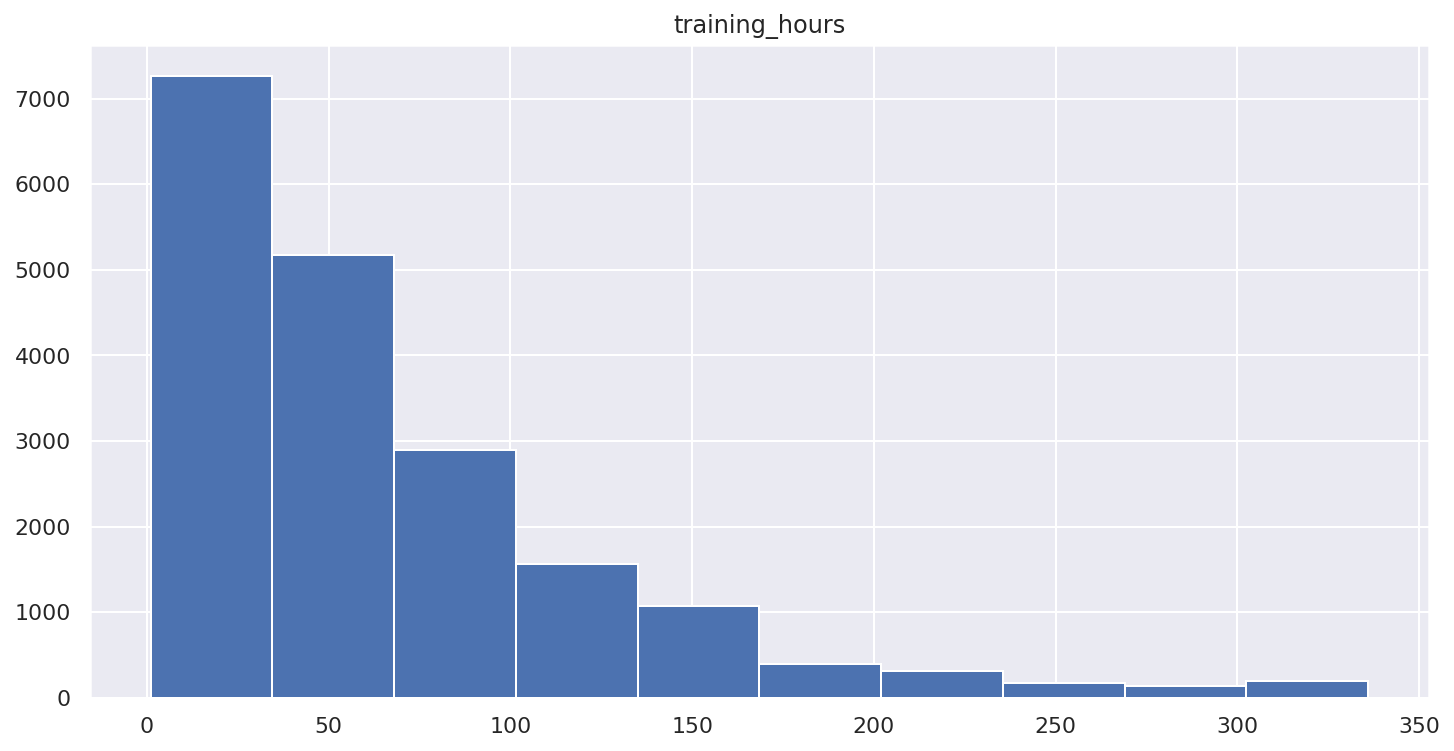

In [55]:
# Create a histogram for our numaric variables : 
df[numaric_variables].hist(figsize=(12, 6))